In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
train.shape, test.shape

((20000, 22), (5000, 21))

As we can see in our train data we have 20k data points and in our test set we have 5000 data points.

No of Independent columns are 21 and 1 target (dependent column)

In [5]:
train['Crime_Category'].unique()

array(['Property Crimes', 'Violent Crimes', 'Other Crimes',
       'Crimes against Public Order', 'Fraud and White-Collar Crimes',
       'Crimes against Persons'], dtype=object)

This is the target variable : Crime_Category, as you can see it has 6 unique values which makes our problem statement as multi-class

Exploratory Data Analysis

Checking for nulls

In [6]:
train.isna().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

We have nulls in Cross street, Modulus Operandi, Victim sex and victim descent, Weapon used code and weapon description, Premise Description. A total of 7 columns have nulls

In [7]:
train.columns.to_list()

['Location',
 'Cross_Street',
 'Latitude',
 'Longitude',
 'Date_Reported',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'Reporting_District_no',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Premise_Description',
 'Weapon_Used_Code',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

Columns Description:

    Location: Street address of the crime incident.
    Cross_Street: Cross street of the rounded address.
    Latitude: Latitude coordinates of the crime incident.
    Longitude: Longitude coordinates of the crime incident.
    Date_Reported: Date the incident was reported.
    Date_Occurred: Date the incident occurred.
    Time_Occurred: Time the incident occurred in 24-hour military time.
    Area_ID: LAPD's Geographic Area number.
    Area_Name: Name designation of the LAPD Geographic Area.
    Reporting_District_no: Reporting district number.
    Part 1-2: Crime classification.
    Modus_Operandi: Activities associated with the suspect.
    Victim_Age: Age of the victim.
    Victim_Sex: Gender of the victim.
    Victim_Descent: Descent code of the victim.
    Premise_Code: Premise code indicating the location of the crime.
    Premise_Description: Description of the premise code.
    Weapon_Used_Code: Weapon code indicating the type of weapon used.
    Weapon_Description: Description of the weapon code.
    Status: Status of the case.
    Status_Description: Description of the status code.
    Crime_Category: The category of the crime (Target Variable)


This is a sample data point in the data

In [8]:
train.iloc[10000]

Location                        6500    VAN NUYS                     BL
Cross_Street                                                        NaN
Latitude                                                        34.1887
Longitude                                                     -118.4487
Date_Reported                                    09/21/2020 12:00:00 AM
Date_Occurred                                    09/20/2020 12:00:00 AM
Time_Occurred                                                    2100.0
Area_ID                                                             9.0
Area_Name                                                      Van Nuys
Reporting_District_no                                             926.0
Part 1-2                                                            2.0
Modus_Operandi                                      0329 1300 0417 2004
Victim_Age                                                         38.0
Victim_Sex                                                      

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [10]:
train['Victim_Age'].min()

-2.0

In [11]:
train.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


This is not too straightforward but we can arrive at some conclusions from the Victim's Age column
As you can see the minimum age of the victim is which is practically not possible and has to be fixed in feature engineering
and the highest age of the victim is 99. with a mean victim age of 30.13.

In [12]:
#printing the column names with type object
object_columns = train.select_dtypes(include='object').columns
print("Columns with type 'object':", object_columns)

Columns with type 'object': Index(['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred',
       'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent',
       'Premise_Description', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')


In [13]:
train[object_columns]

,Location,Cross_Street,Date_Reported,Date_Occurred,Area_Name,Modus_Operandi,Victim_Sex,Victim_Descent,Premise_Description,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,N Hollywood,0385,M,W,STREET,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,Newton,0906 0352 0371 0446 1822 0344 0416 0417,M,H,SWAP MEET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,Newton,0329 1202,M,B,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,Mission,0329 1300,M,H,STREET,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,77th Street,0416 0945 1822 0400 0417 0344,X,X,MINI-MART,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,NaN,05/24/2020 12:00:00 AM,05/24/2020 12:00:00 AM,Southwest,0416 0446 2004 0913,M,H,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
19996,16900 ROSCOE BL,NaN,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,West Valley,1822 0209 0344 1414 1420,M,W,GAS STATION,NaN,IC,Invest Cont,Property Crimes
19997,1000 S SHENANDOAH ST,NaN,09/25/2020 12:00:00 AM,09/25/2020 12:00:00 AM,West LA,0344 1822 1420,M,H,SIDEWALK,NaN,IC,Invest Cont,Property Crimes
19998,300 W SEPULVEDA ST,NaN,06/10/2020 12:00:00 AM,06/10/2020 12:00:00 AM,Harbor,1202 2038 0913 0602 1242 0553,F,H,SINGLE FAMILY DWELLING,NaN,IC,Invest Cont,Crimes against Public Order


In [14]:
for col in object_columns:
    print(col, " ", train[col].value_counts())
    

Location   Location
6TH                                        33
7TH                                        32
VERMONT                      AV            31
6TH                          ST            31
7TH                          ST            30
                                           ..
2700 E  1ST                          ST     1
9300    SWINTON                      AV     1
MCKINLEY                                    1
WADE                         ST             1
DALTON                       AV             1
Name: count, Length: 12399, dtype: int64
Cross_Street   Cross_Street
BROADWAY                           56
FIGUEROA                           43
VERMONT                      AV    40
FIGUEROA                     ST    34
MAIN                               33
                                   ..
VENTURA CANYON               BL     1
E  ORLANDO                          1
D                            ST     1
CABRILLO                     AV     1
HAVELOCK                 

Starting with Area ID

    Area_ID: LAPD's Geographic Area number.
    Area_Name: Name designation of the LAPD Geographic Area.

In [15]:
train['Area_Name'].nunique()

21

In [16]:
train['Area_Name'].value_counts()

Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64

In [17]:
train['Area_ID'].value_counts()

Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64

In [18]:
train['Area_ID'].nunique()

21

In [19]:
train[['Area_ID', 'Area_Name']]

,Area_ID,Area_Name
0,15.0,N Hollywood
1,13.0,Newton
2,13.0,Newton
3,19.0,Mission
4,12.0,77th Street
...,...,...
19995,3.0,Southwest
19996,10.0,West Valley
19997,8.0,West LA
19998,5.0,Harbor


In [20]:
train[train['Area_ID']==15.0][['Area_ID', 'Area_Name']]

,Area_ID,Area_Name
0,15.0,N Hollywood
44,15.0,N Hollywood
55,15.0,N Hollywood
92,15.0,N Hollywood
121,15.0,N Hollywood
...,...,...
19873,15.0,N Hollywood
19907,15.0,N Hollywood
19916,15.0,N Hollywood
19975,15.0,N Hollywood


From the above code, we can infer that. we can drop the area name column.

each area has a unique ID, so there's a chance to drop the area name

In [21]:
train['Weapon_Description']

0                                                   NaN
1        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
2                                                   NaN
3                                                   NaN
4        STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
                              ...                      
19995    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
19996                                               NaN
19997                                               NaN
19998                                               NaN
19999                                               NaN
Name: Weapon_Description, Length: 20000, dtype: object

Unique values in object columns

In [22]:
for col in object_columns:
    print(col, " ", train[col].nunique())
    

Location   12399
Cross_Street   1495
Date_Reported   811
Date_Occurred   366
Area_Name   21
Modus_Operandi   10489
Victim_Sex   4
Victim_Descent   17
Premise_Description   216
Weapon_Description   57
Status   5
Status_Description   5
Crime_Category   6


Overall unique values in all columns

In [23]:
for col in train.columns:
    print(col, " ", train[col].nunique())
    

Location   12399
Cross_Street   1495
Latitude   3622
Longitude   3578
Date_Reported   811
Date_Occurred   366
Time_Occurred   996
Area_ID   21
Area_Name   21
Reporting_District_no   1120
Part 1-2   2
Modus_Operandi   10489
Victim_Age   100
Victim_Sex   4
Victim_Descent   17
Premise_Code   217
Premise_Description   216
Weapon_Used_Code   57
Weapon_Description   57
Status   5
Status_Description   5
Crime_Category   6


Similar case with Weapon Description and Weapon used code

In [24]:
train['Weapon_Used_Code'].value_counts()

Weapon_Used_Code
400.0    3990
500.0     789
511.0     546
102.0     388
200.0     160
109.0     154
106.0     131
207.0     125
307.0      84
512.0      80
306.0      63
212.0      55
312.0      52
304.0      51
308.0      49
205.0      45
201.0      43
114.0      41
204.0      37
302.0      37
113.0      35
101.0      34
301.0      26
310.0      26
215.0      25
223.0      24
311.0      23
219.0      23
506.0      22
107.0      18
515.0      18
218.0      17
305.0      16
221.0      14
216.0      13
103.0      12
309.0      11
112.0       8
104.0       7
514.0       7
211.0       6
513.0       4
303.0       4
510.0       3
206.0       3
508.0       2
504.0       2
105.0       2
214.0       2
503.0       1
501.0       1
202.0       1
111.0       1
210.0       1
122.0       1
115.0       1
213.0       1
Name: count, dtype: int64

In [25]:
train['Weapon_Used_Code'].isna().sum() #it has nulls

12665

In [26]:
train[train['Weapon_Used_Code']==400.0][['Weapon_Description', 'Weapon_Used_Code']]

,Weapon_Description,Weapon_Used_Code
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
4,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
5,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
19,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
31,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
...,...,...
19978,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
19981,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
19982,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
19984,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0


In [27]:
train[['Weapon_Description', 'Weapon_Used_Code']]

,Weapon_Description,Weapon_Used_Code
0,NaN,NaN
1,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
2,NaN,NaN
3,NaN,NaN
4,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
...,...,...
19995,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",400.0
19996,NaN,NaN
19997,NaN,NaN
19998,NaN,NaN


Similar case with status and status description

    Status: Status of the case.
    Status_Description: Description of the status code.

In [28]:
train['Status'].value_counts()

Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64

In [29]:
train[train['Status']=='IC'][['Status', 'Status_Description']].head(2)

,Status,Status_Description
0,IC,Invest Cont
1,IC,Invest Cont


In [30]:
train[train['Status']=='AO'][['Status', 'Status_Description']].head(2)

,Status,Status_Description
5,AO,Adult Other
10,AO,Adult Other


In [31]:
train[train['Status']=='AA'][['Status', 'Status_Description']].head(2)

,Status,Status_Description
9,AA,Adult Arrest
28,AA,Adult Arrest


In [32]:
train[train['Status']=='JA'][['Status', 'Status_Description']].head(2)

,Status,Status_Description
333,JA,Juv Arrest
456,JA,Juv Arrest


In [33]:
train[train['Status']=='JO'][['Status', 'Status_Description']].head(2)

,Status,Status_Description
427,JO,Juv Other
563,JO,Juv Other


In [34]:
train[['Status', 'Status_Description']]

,Status,Status_Description
0,IC,Invest Cont
1,IC,Invest Cont
2,IC,Invest Cont
3,IC,Invest Cont
4,IC,Invest Cont
...,...,...
19995,IC,Invest Cont
19996,IC,Invest Cont
19997,IC,Invest Cont
19998,IC,Invest Cont


In [35]:
train['Status_Description'].value_counts()

Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64

    Premise_Code: Premise code indicating the location of the crime.
    Premise_Description: Description of the premise code.

In [36]:
train['Premise_Code']

0        101.0
1        216.0
2        501.0
3        101.0
4        401.0
         ...  
19995    501.0
19996    301.0
19997    102.0
19998    501.0
19999    101.0
Name: Premise_Code, Length: 20000, dtype: float64

In [37]:
train[['Premise_Code', 'Premise_Description']]

,Premise_Code,Premise_Description
0,101.0,STREET
1,216.0,SWAP MEET
2,501.0,SINGLE FAMILY DWELLING
3,101.0,STREET
4,401.0,MINI-MART
...,...,...
19995,501.0,SINGLE FAMILY DWELLING
19996,301.0,GAS STATION
19997,102.0,SIDEWALK
19998,501.0,SINGLE FAMILY DWELLING


In [38]:
train[['Premise_Code', 'Premise_Description']].isna().sum()

Premise_Code           0
Premise_Description    5
dtype: int64

In [39]:
null_description_rows = train[train['Premise_Description'].isnull()]
print(null_description_rows['Premise_Code'])

9884     418.0
11029    418.0
15562    418.0
17306    418.0
18204    418.0
Name: Premise_Code, dtype: float64


In [40]:
null_description_rows

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
9884,5600 MELROSE AV,NaN,34.0853,-118.3277,04/08/2020 12:00:00 AM,04/07/2020 12:00:00 AM,1000.0,6.0,Hollywood,676.0,...,62.0,M,O,418.0,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
11029,2100 W SLAUSON AV,NaN,33.9891,-118.3158,06/24/2020 12:00:00 AM,06/24/2020 12:00:00 AM,1420.0,12.0,77th Street,1233.0,...,37.0,M,B,418.0,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Violent Crimes
15562,1700 S MAIN ST,NaN,33.9874,-118.4706,11/07/2020 12:00:00 AM,11/07/2020 12:00:00 AM,30.0,14.0,Pacific,1431.0,...,63.0,M,W,418.0,NaN,NaN,NaN,IC,Invest Cont,Property Crimes
17306,400 S SAN VICENTE BL,NaN,34.0709,-118.3761,09/19/2020 12:00:00 AM,09/12/2020 12:00:00 AM,1200.0,7.0,Wilshire,722.0,...,52.0,M,O,418.0,NaN,NaN,NaN,IC,Invest Cont,Property Crimes
18204,8400 W 3RD ST,NaN,34.0730,-118.3731,06/07/2020 12:00:00 AM,05/30/2020 12:00:00 AM,1830.0,7.0,Wilshire,722.0,...,38.0,M,H,418.0,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [41]:
train[train['Premise_Code']==418.0][['Premise_Code', 'Premise_Description']]

,Premise_Code,Premise_Description
9884,418.0,NaN
11029,418.0,NaN
15562,418.0,NaN
17306,418.0,NaN
18204,418.0,NaN


On overall premise code and premise description we have 5 nulls for the premise code 418.0

    Data Visualizations

In [42]:
target = train[['Crime_Category']]

In [43]:
train["Crime_Category"].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

* Property Crimes                  11666
* Violent Crimes                    4767
* Crimes against Public Order       1808
* Fraud and White-Collar Crimes     1355
* Crimes against Persons             225
* Other Crimes                       179

This is a clear imbalance between the highest class and the lowest class

In [44]:

category_counts = train["Crime_Category"].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
for label, percentage in zip(category_counts.index, percentages):
  print(f"{label}: {percentage:.1f}%")


Property Crimes: 58.3%
Violent Crimes: 23.8%
Crimes against Public Order: 9.0%
Fraud and White-Collar Crimes: 6.8%
Crimes against Persons: 1.1%
Other Crimes: 0.9%


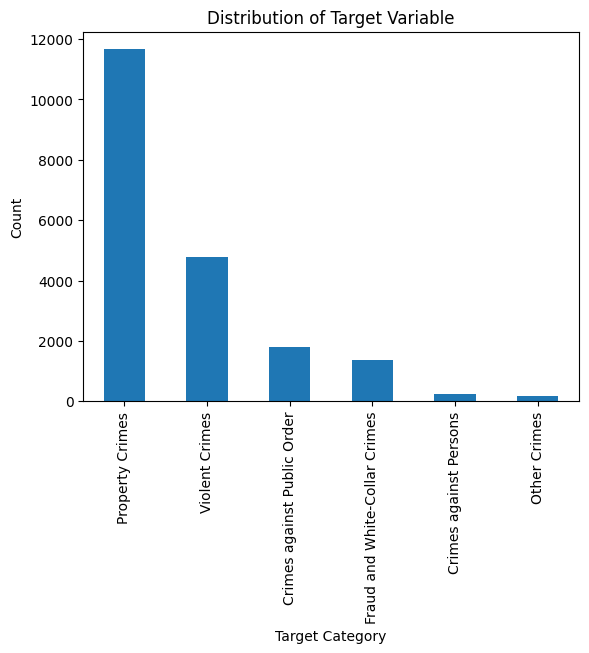

In [45]:
import matplotlib.pyplot as plt 
import seaborn as sns
train["Crime_Category"].value_counts().plot(kind="bar")
plt.xlabel("Target Category")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()



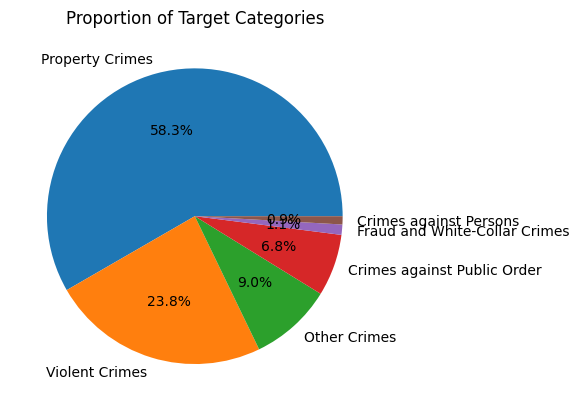

Property Crimes: 58.3%
Violent Crimes: 23.8%
Crimes against Public Order: 9.0%
Fraud and White-Collar Crimes: 6.8%
Crimes against Persons: 1.1%
Other Crimes: 0.9%


In [46]:
plt.pie(train["Crime_Category"].value_counts(), labels=train["Crime_Category"].unique(), autopct="%1.1f%%")
plt.title("Proportion of Target Categories")
plt.show()

category_counts = train["Crime_Category"].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
for label, percentage in zip(category_counts.index, percentages):
  print(f"{label}: {percentage:.1f}%")


Comparing the Target with the Victim sex

In [47]:
train["Victim_Sex"].value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

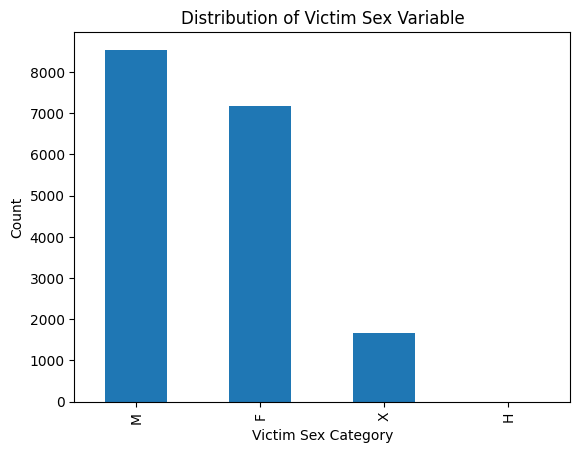

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns
train["Victim_Sex"].value_counts().plot(kind="bar")
plt.xlabel("Victim Sex Category")
plt.ylabel("Count")
plt.title("Distribution of Victim Sex Variable")
plt.show()



In [49]:

category_counts =train["Victim_Sex"].value_counts()
total_count = category_counts.sum()
percentages = (category_counts / total_count) * 100
for label, percentage in zip(category_counts.index, percentages):
  print(f"{label}: {percentage:.3f}%")


M: 49.137%
F: 41.298%
X: 9.553%
H: 0.012%


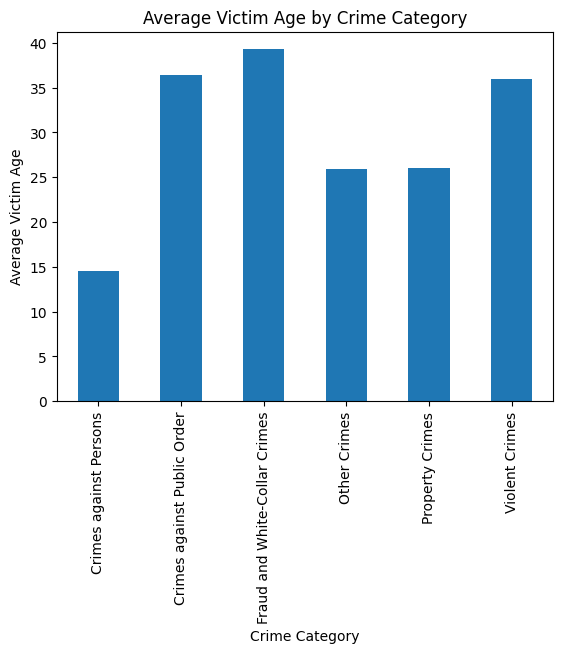

In [50]:
train.groupby('Crime_Category')['Victim_Age'].mean().plot(kind='bar')
plt.xlabel('Crime Category')
plt.ylabel('Average Victim Age')
plt.title('Average Victim Age by Crime Category')
plt.show()


In [51]:
train.groupby('Crime_Category')['Victim_Age'].mean()

Crime_Category
Crimes against Persons           14.555556
Crimes against Public Order      36.420907
Fraud and White-Collar Crimes    39.284871
Other Crimes                     25.949721
Property Crimes                  26.072176
Violent Crimes                   35.985316
Name: Victim_Age, dtype: float64

This is the average age of the victim based on type of the crime happened. 

we can see the average age of victim for crime against persons class is only 14.55 ~ 15years. 

Plot based on Area Name and Crime category

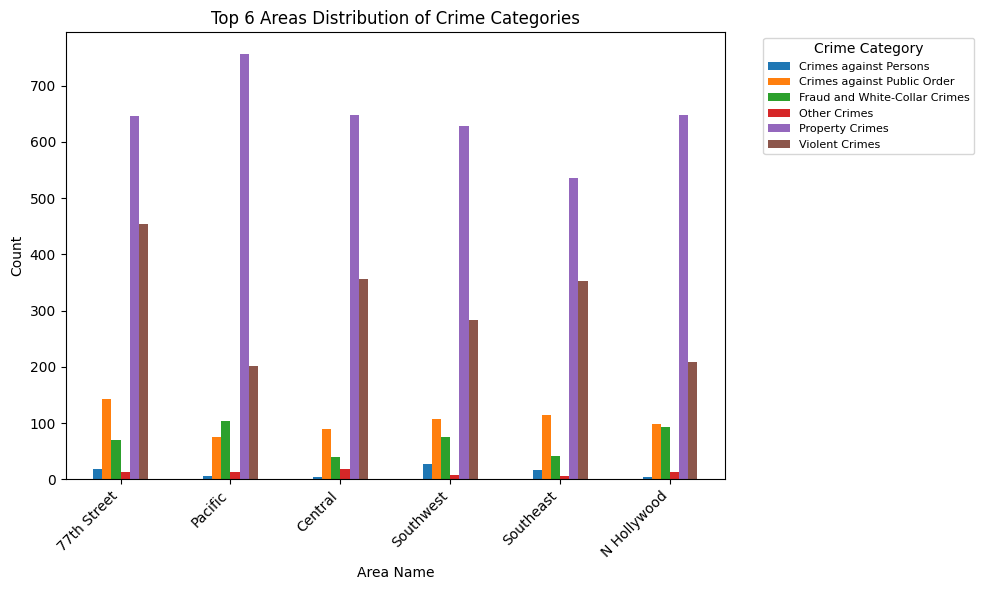

In [52]:
target_value_counts = train.groupby(['Area_Name', 'Crime_Category'])['Crime_Category'].count().unstack(fill_value=0)

top_6_areas = target_value_counts.sum(axis=1).sort_values(ascending=False).head(6).index
filtered_data = target_value_counts.loc[top_6_areas]
fig, ax = plt.subplots(figsize=(10, 6))
filtered_data.plot(kind='bar', ax=ax)
plt.xlabel('Area Name')
plt.ylabel('Count')
plt.title('Top 6 Areas Distribution of Crime Categories')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Crime Category', 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           fontsize=8)
plt.tight_layout()
plt.show()

These are the top 6 areas with higher crime rate. 

    77th Street    1345
    Pacific        1157
    Central        1156
    Southwest      1130
    Southeast      1067
    N Hollywood    1065

Univariate Analysis

We are going to check the distribution of Victim age

In [53]:
train[train['Victim_Age']<=0]

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
6,1600 N SOTO ST,NaN,34.0623,-118.1980,08/17/2020 12:00:00 AM,08/17/2020 12:00:00 AM,1840.0,4.0,Hollenbeck,448.0,...,0.0,X,X,202.0,LIQUOR STORE,NaN,NaN,IC,Invest Cont,Property Crimes
8,5500 COLDWATER CA AV,NaN,34.1781,-118.4179,01/28/2020 12:00:00 AM,01/26/2020 12:00:00 AM,1600.0,9.0,Van Nuys,939.0,...,0.0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,Property Crimes
12,100 THE GROVE DR,NaN,34.0761,-118.3563,02/03/2020 12:00:00 AM,02/03/2020 12:00:00 AM,500.0,7.0,Wilshire,724.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
15,3000 JOHNSTON ST,NaN,34.0805,-118.2087,07/31/2020 12:00:00 AM,07/31/2020 12:00:00 AM,1700.0,4.0,Hollenbeck,414.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,22100 GRESHAM ST,NaN,34.2304,-118.6083,08/22/2020 12:00:00 AM,08/22/2020 12:00:00 AM,400.0,21.0,Topanga,2103.0,...,0.0,NaN,NaN,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
19991,3900 BERRYMAN AV,NaN,34.0078,-118.4217,03/06/2020 12:00:00 AM,03/05/2020 12:00:00 AM,2100.0,14.0,Pacific,1449.0,...,0.0,NaN,NaN,104.0,DRIVEWAY,NaN,NaN,IC,Invest Cont,Property Crimes
19993,2500 CRENSHAW BL,NaN,34.0337,-118.3344,06/13/2020 12:00:00 AM,06/13/2020 12:00:00 AM,1008.0,3.0,Southwest,313.0,...,0.0,NaN,NaN,108.0,PARKING LOT,NaN,NaN,IC,Invest Cont,Property Crimes
19996,16900 ROSCOE BL,NaN,34.2212,-118.5011,12/25/2020 12:00:00 AM,12/25/2020 12:00:00 AM,259.0,10.0,West Valley,1008.0,...,0.0,M,W,301.0,GAS STATION,NaN,NaN,IC,Invest Cont,Property Crimes


as you can see there are 4834 ~ 5000 rows with the victim age <=0. This shouldn't be the case. either we round off the negatives to zero or replace the value with a null or replace with a hardcoded value.

In [54]:
train[train['Victim_Age']<0]

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
251,1700 ORCHID AV,NaN,34.1030,-118.3402,06/02/2023 12:00:00 AM,05/31/2020 12:00:00 AM,430.0,6.0,Hollywood,645.0,...,-2.0,X,X,203.0,OTHER BUSINESS,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,Property Crimes
717,16800 SAN FERNANDO MISSION BL,NaN,34.2720,-118.4978,05/25/2023 12:00:00 AM,06/02/2020 12:00:00 AM,1.0,17.0,Devonshire,1737.0,...,-2.0,M,W,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Fraud and White-Collar Crimes
5877,4100 GREENBRIAR LN,NaN,34.1459,-118.5350,05/19/2021 12:00:00 AM,01/01/2020 12:00:00 AM,1200.0,10.0,West Valley,1094.0,...,-1.0,M,O,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
11008,12200 WILSHIRE BL,NaN,34.0432,-118.4685,06/20/2022 12:00:00 AM,06/19/2020 12:00:00 AM,1600.0,8.0,West LA,841.0,...,-1.0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,Property Crimes
12993,13000 OXNARD ST,NaN,34.1794,-118.4161,03/16/2022 12:00:00 AM,03/13/2020 12:00:00 AM,1200.0,9.0,Van Nuys,939.0,...,-1.0,F,W,721.0,HIGH SCHOOL,NaN,NaN,IC,Invest Cont,Property Crimes
14021,8600 S SEPULVEDA BL,NaN,33.9598,-118.3962,01/18/2022 12:00:00 AM,07/16/2020 12:00:00 AM,300.0,14.0,Pacific,1487.0,...,-1.0,X,X,203.0,OTHER BUSINESS,NaN,NaN,IC,Invest Cont,Property Crimes


we have only 6 rows with victim age as negative

------------------------------------------------------------

**Feature Engineering**

In [55]:
#We can also use a label encoder here

replacement_dict = {'Property Crimes': 0,
                    'Violent Crimes': 1,
                    'Crimes against Public Order': 2,
                    'Fraud and White-Collar Crimes': 3,
                    'Crimes against Persons': 4,  
                    'Other Crimes': 5} 
train['Crime_Category'] = train['Crime_Category'].replace(replacement_dict)


/tmp/ipykernel_18/2259347491.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Crime_Category'] = train['Crime_Category'].replace(replacement_dict)


Outlier analysis

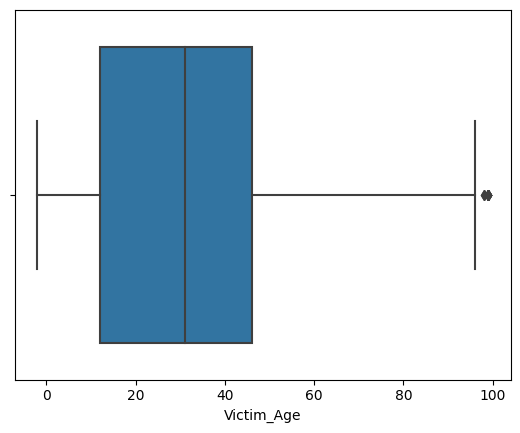

In [56]:
sns.boxplot(x=train['Victim_Age'])
plt.show()

Outlier analysis using IQR

<Axes: title={'center': 'Victim_Age'}>

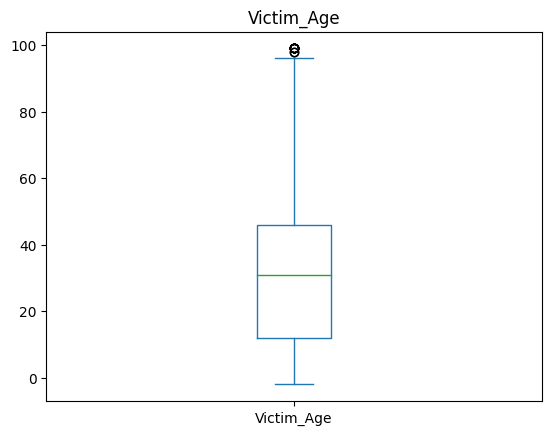

In [57]:
train['Victim_Age'].plot(kind="box", title="Victim_Age")

In [58]:
Q1 = train['Victim_Age'].quantile(0.25)
Q3 = train['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
new_data = train[(train['Victim_Age'] > lower_bound) & (train['Victim_Age'] < upper_bound)]
new_data.shape

(19987, 22)

In [59]:
Q1 = train['Victim_Age'].quantile(0.25)
Q3 = train['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
train = train[(train['Victim_Age'] > lower_bound) & (train['Victim_Age'] < upper_bound)]
train.shape

(19987, 22)

In [60]:
lower_bound, upper_bound

(-39.0, 97.0)

In [61]:
Q1, Q3

(12.0, 46.0)

In [62]:
train[train['Victim_Age']>97]

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category


These are the 13 outliers which we dropped

Creating new columns from the existing ones

In [63]:
# Convert the date columns to datetime format
train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])
train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])

# Calculate the difference in minutes
train['time_between_date_occured_and_reported'] = (train['Date_Reported'] - train['Date_Occurred']) / pd.Timedelta(minutes=1)

# Get the absolute difference in minutes
train['time_between_date_occured_and_reported'] = train['time_between_date_occured_and_reported'].abs().astype(int)

# Print the dataframe
print(train)

                                       Location  \
0       4500    CARPENTER                    AV   
1               45TH                         ST   
2        600 E  MARTIN LUTHER KING JR        BL   
3      14900    ORO GRANDE                   ST   
4       7100 S  VERMONT                      AV   
...                                         ...   
19995   5100 W  ADAMS                        BL   
19996  16900    ROSCOE                       BL   
19997   1000 S  SHENANDOAH                   ST   
19998    300 W  SEPULVEDA                    ST   
19999           DALTON                       AV   

                          Cross_Street  Latitude  Longitude Date_Reported  \
0                                  NaN   34.1522  -118.3910    2020-03-09   
1      ALAMEDA                      ST   34.0028  -118.2391    2020-02-27   
2                                  NaN   34.0111  -118.2653    2020-08-21   
3                                  NaN   34.2953  -118.4590    2020-11-08   
4 

/tmp/ipykernel_18/1605677976.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Reported'] = pd.to_datetime(train['Date_Reported'])
/tmp/ipykernel_18/1605677976.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Date_Occurred'] = pd.to_datetime(train['Date_Occurred'])


Put it in pipelines

In [64]:
# Convert the date columns to datetime format
test['Date_Reported'] = pd.to_datetime(test['Date_Reported'])
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'])

# Calculate the difference in minutes
test['time_between_date_occured_and_reported'] = (test['Date_Reported'] - test['Date_Occurred']) / pd.Timedelta(minutes=1)

# Get the absolute difference in minutes
test['time_between_date_occured_and_reported'] = test['time_between_date_occured_and_reported'].abs().astype(int)

# Print the dataframe
print(test)

                                      Location  \
0      1500    LEIGHTON                     AV   
1       100 S  NORMANDIE                    AV   
2       300 E  111TH                        ST   
3      1300 S  LA BREA                      AV   
4     11000    MORRISON                     ST   
...                                        ...   
4995   4600    MASCOT                       ST   
4996   2200 E  7TH                          ST   
4997           LANGDON                      AV   
4998    400 E  5TH                          ST   
4999  10100 S  SAN PEDRO                    ST   

                         Cross_Street  Latitude  Longitude Date_Reported  \
0                                 NaN   34.0128  -118.3045    2020-03-03   
1                                 NaN   34.0726  -118.3029    2020-06-01   
2                                 NaN   33.9348  -118.2695    2020-08-28   
3                                 NaN   34.0497  -118.3442    2020-12-23   
4                  

/tmp/ipykernel_18/3883583963.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date_Reported'] = pd.to_datetime(test['Date_Reported'])
/tmp/ipykernel_18/3883583963.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'])


Modus Operandi

In [65]:
import pandas as pd
import re
import json
import numpy as np

# Step 1: Replace NaN with '0' in the training data
train['Modus_Operandi'] = train['Modus_Operandi'].fillna('0')

# Step 2: Extract unique codes and create a mapping
unique_codes = set()
for item in train['Modus_Operandi']:
    if isinstance(item, str):
        codes = re.findall(r'\d+', item)
        unique_codes.update(codes)

code_mapping = {code: str(i+1) for i, code in enumerate(sorted(unique_codes))}

print("Code mapping:", code_mapping)

# Step 3: Create a function to encode the Modus Operandi
def encode_modus_operandi(mo_string, mapping):
    if pd.isna(mo_string) or mo_string == '':
        return '0'
    
    if not isinstance(mo_string, str):
        mo_string = str(mo_string)
    
    codes = re.findall(r'\d+', mo_string)
    encoded = [mapping.get(code, '0') for code in codes]
    return ''.join(encoded) if encoded else '0'

# Step 4: Apply the encoding to the Modus Operandi column in training data
train['Encoded_Modus_Operandi'] = train['Modus_Operandi'].apply(lambda x: encode_modus_operandi(x, code_mapping))

# Print the first few rows of training data to verify the encoding
print("Training data:")
print(train[['Modus_Operandi', 'Encoded_Modus_Operandi']].head())

# Save the code mapping for future reference
with open('modus_operandi_mapping.json', 'w') as f:
    json.dump(code_mapping, f)

print("Encoding complete for training data. Mapping saved to 'modus_operandi_mapping.json'")

# Now, process the test data

# Load the mapping (this step is redundant here but useful if run separately)
with open('modus_operandi_mapping.json', 'r') as f:
    code_mapping = json.load(f)

# Replace NaN with '0' in the test data
test['Modus_Operandi'] = test['Modus_Operandi'].fillna('0')

# Apply encoding to test data
test['Encoded_Modus_Operandi'] = test['Modus_Operandi'].apply(lambda x: encode_modus_operandi(x, code_mapping))

# Print the first few rows of test data to verify the encoding
print("\nTest data:")
print(test[['Modus_Operandi', 'Encoded_Modus_Operandi']].head())

print("Test data encoding complete.")

Code mapping: {'0': '1', '0100': '2', '0104': '3', '0105': '4', '0110': '5', '0112': '6', '0113': '7', '0114': '8', '0115': '9', '0117': '10', '0120': '11', '0121': '12', '0200': '13', '0201': '14', '0202': '15', '0206': '16', '0207': '17', '0209': '18', '0210': '19', '0211': '20', '0212': '21', '0213': '22', '0216': '23', '0217': '24', '0220': '25', '0301': '26', '0302': '27', '0303': '28', '0304': '29', '0305': '30', '0307': '31', '0308': '32', '0309': '33', '0310': '34', '0311': '35', '0312': '36', '0314': '37', '0315': '38', '0316': '39', '0319': '40', '0321': '41', '0322': '42', '0323': '43', '0324': '44', '0325': '45', '0326': '46', '0327': '47', '0328': '48', '0329': '49', '0330': '50', '0332': '51', '0334': '52', '0335': '53', '0336': '54', '0337': '55', '0338': '56', '0339': '57', '0340': '58', '0341': '59', '0342': '60', '0343': '61', '0344': '62', '0345': '63', '0346': '64', '0347': '65', '0349': '66', '0350': '67', '0351': '68', '0352': '69', '0353': '70', '0354': '71', '03

dropping columns

Based on the above EDA and Observations

In [66]:
X_train = train.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Crime_Category','Cross_Street'], axis=1)
X_test = test.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Cross_Street'], axis=1)
Y_train = train[['Crime_Category']]

In [67]:
X_train.columns

Index(['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
       'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'],
      dtype='object')

In [68]:
X_train.shape, X_test.shape

((19987, 14), (5000, 14))

In [69]:
new_categories = set(test['Victim_Descent'].unique()) - set(train['Victim_Descent'].unique())

In [70]:
new_categories

{'S'}

In [71]:
#X_test=X_test.loc[~X_test['Victim_Descent'].isin(new_categories)]

In [72]:
#X_test=X_test.loc[~X_test['Victim_Descent'].isin(new_categories)]

In [73]:
X_test['Victim_Descent'] = X_test['Victim_Descent'].replace(to_replace=new_categories, value=np.nan)

In [74]:
new_categories = set(X_test['Victim_Descent'].unique()) - set(train['Victim_Descent'].unique())
new_categories

set()

In [75]:
'''new_categories = set(test['Cross_Street'].unique()) - set(train['Cross_Street'].unique())
X_test['Cross_Street'] = X_test['Cross_Street'].replace(to_replace=new_categories, value=np.nan)'''

"new_categories = set(test['Cross_Street'].unique()) - set(train['Cross_Street'].unique())\nX_test['Cross_Street'] = X_test['Cross_Street'].replace(to_replace=new_categories, value=np.nan)"

In [76]:
new_categories = set(test['Location'].unique()) - set(train['Location'].unique())


In [77]:
new_categories

{'2100    VENICE                       BL',
 '8300    KEOKUK                       AV',
 '23900    VICTORY                      BL',
 '2100    SANTA ANA',
 '2400    MARATHON                     ST',
 '1900 N  BEVERLY                      DR',
 '5100    3RD                          AV',
 '6200    TOPANGA                      BL',
 '1500    EWING                        ST',
 '11600    HAYNES                       ST',
 '900 E  JEFFERSON                    BL',
 '11000    PEORIA                       ST',
 '6900    KNOWLTON                     PL',
 '6200    BLUCHER                      AV',
 '4300    WESTLAWN',
 '6600    IRVINE                       AV',
 '16800 W  VENTURA                      BL',
 '4500    CAMELLIA                     AV',
 '400 N  STANLEY                      AV',
 '200 E  MANCHESTER                   AV',
 '3500 W  54TH                         ST',
 '4300 W  28TH                         ST',
 '1400    CERRO GORDO                  ST',
 '1800    SILVER LAKE           

In [78]:
X_train.shape, X_test.shape

((19987, 14), (5000, 14))

In [79]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

'''label_cross_street  = LabelEncoder()
X_train['Cross_Street'].fillna("missing")
X_test['Cross_Street'].fillna("missing")
label_cross_street  = LabelEncoder()
X_train['Cross_Street'] = label_cross_street.fit_transform(X_train['Cross_Street'])
X_test['Cross_Street'] = label_cross_street.transform(X_test['Cross_Street'])'''

label_status  = LabelEncoder()
X_train['Status'].fillna("missing")
X_test['Status'].fillna("missing")

X_train['Status'] = label_status.fit_transform(X_train['Status'])
X_test['Status'] = label_status.transform(X_test['Status'])

label_victim_descent  = LabelEncoder()
X_train['Victim_Descent'].fillna("missing")
X_test['Victim_Descent'].fillna("missing")
X_train['Victim_Descent'] = label_victim_descent.fit_transform(X_train['Victim_Descent'])
X_test['Victim_Descent'] = label_victim_descent.transform(X_test['Victim_Descent'])

label_victim_sex  = LabelEncoder()
X_train['Victim_Sex'].fillna("missing")
X_test['Victim_Sex'].fillna("missing")
X_train['Victim_Sex'] = label_status.fit_transform(X_train['Victim_Sex'])
X_test['Victim_Sex'] = label_status.transform(X_test['Victim_Sex'])



In [80]:
# from sklearn.impute import SimpleImputer
# value = 99999
# # Specify the strategy as 'constant' and the fill_value as your desired static value
# imputer = SimpleImputer(strategy='constant', fill_value=value)


In [81]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


In [82]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Using KNN imputer

In [83]:
# from sklearn.impute import SimpleImputer, KNNImputer
# imputer = KNNImputer(n_neighbors=5)
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)


In [84]:
# Convert Crime_Category to category type
Y_train['Crime_Category'] = Y_train['Crime_Category'].astype('category')
# Encode the categorical column to numeric values
Y_train['Crime_Category'] = Y_train['Crime_Category'].cat.codes
print(Y_train.dtypes)

Crime_Category    int8
dtype: object


/tmp/ipykernel_18/4014897255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train['Crime_Category'] = Y_train['Crime_Category'].astype('category')
/tmp/ipykernel_18/4014897255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_train['Crime_Category'] = Y_train['Crime_Category'].cat.codes


In [85]:
X_test.shape

(5000, 14)

In [86]:
X_test

array([[ 3.40128000e+01, -1.18304500e+02,  2.00000000e+03, ...,
         2.00000000e+00,  0.00000000e+00,  1.27295297e+17],
       [ 3.40726000e+01, -1.18302900e+02,  1.70000000e+03, ...,
         2.00000000e+00,  5.32800000e+04,  6.21080000e+04],
       [ 3.39348000e+01, -1.18269500e+02,  9.00000000e+02, ...,
         2.00000000e+00,  1.44000000e+03,  4.06207419e+14],
       ...,
       [ 3.42392000e+01, -1.18469800e+02,  2.10000000e+03, ...,
         0.00000000e+00,  0.00000000e+00,  2.25401127e+08],
       [ 3.40453000e+01, -1.18244300e+02,  2.33500000e+03, ...,
         1.00000000e+00,  1.44000000e+03,  1.27000000e+02],
       [ 3.39438000e+01, -1.18269500e+02,  3.20000000e+02, ...,
         2.00000000e+00,  0.00000000e+00,  4.06490000e+04]])

In [87]:
X_train = pd.DataFrame(X_train, columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status','Encoded_Modus_Operandi',
       'time_between_date_occured_and_reported'])
X_test = pd.DataFrame(X_test, columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status','Encoded_Modus_Operandi',
       'time_between_date_occured_and_reported'])

In [88]:
numeric_cols = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age',
        'Premise_Code', 'Weapon_Used_Code',
       'time_between_date_occured_and_reported']

In [89]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [90]:
X_train.shape, Y_train.shape

((19987, 14), (19987, 1))

In [91]:
X_train = pd.DataFrame(X_train, columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
       'time_between_date_occured_and_reported'])
X_test = pd.DataFrame(X_test, columns = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
       'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
       'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
       'time_between_date_occured_and_reported'])

In [92]:
X_train.head()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,time_between_date_occured_and_reported
0,0.994876,0.002296,0.762935,0.70,0.697519,0.0,0.785714,2.0,14.0,0.000000,0.641103,2.0,2.159877e-28
1,0.990524,0.003576,0.569975,0.60,0.604008,0.0,0.438776,2.0,6.0,0.132488,0.722222,2.0,4.793154e-10
2,0.990766,0.003355,0.256149,0.60,0.592557,1.0,0.704082,2.0,1.0,0.460829,0.641103,2.0,1.074790e-25
3,0.999045,0.001723,0.762935,0.90,0.869752,0.0,0.642857,2.0,6.0,0.000000,0.641103,2.0,1.076099e-25
4,0.989822,0.003132,0.478796,0.55,0.545802,0.0,0.020408,3.0,15.0,0.345622,0.722222,2.0,2.776149e-14


-----------------------------------------------------------------------------------------------------------------------------------------

Creating DataPreperation

In [93]:
X_train.shape, Y_train.shape

((19987, 13), (19987, 1))

In [94]:
X_train.head(3)

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,time_between_date_occured_and_reported
0,0.994876,0.002296,0.762935,0.7,0.697519,0.0,0.785714,2.0,14.0,0.000000,0.641103,2.0,2.159877e-28
1,0.990524,0.003576,0.569975,0.6,0.604008,0.0,0.438776,2.0,6.0,0.132488,0.722222,2.0,4.793154e-10
2,0.990766,0.003355,0.256149,0.6,0.592557,1.0,0.704082,2.0,1.0,0.460829,0.641103,2.0,1.074790e-25


In [95]:
import os
os.listdir() #prints the output directory

['__notebook__.ipynb', 'modus_operandi_mapping.json']

In [96]:
import os
import json
import pickle
import pandas as pd
import re
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


class DataPrep:
    def __init__(self, X, y, modelartifacts_path, test_size=0.2):
        """
        Splits data into training and validation sets.

        Args:
            X: Features.
            y: Target variable.
            modelartifacts_path: Path to save model artifacts.
            test_size: Proportion of data for the validation set (default: 0.2).
        """
        X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=test_size, random_state=42
        )
        self.train_split = X_train
        self.val_split = X_val
        self.train_labels = y_train
        self.val_labels = y_val
        self.modelartifacts_path = modelartifacts_path
        self.dir_path = f"{self.modelartifacts_path}/"
        os.makedirs(self.dir_path, exist_ok=True)
        
    def save_object(self, feature, est):
        """
        Save the estimator object to a file.

        Parameters:
        - self: The instance of the class.
        - feature (str): The name of the feature or model.
        - est: The estimator object to be saved. It can be either a dictionary
               (if `estimator` is of type dict) or an object supported by pickle.

        Returns:
        - None
        """

        # Check if directory exists, create it if not
        if not os.path.exists(self.dir_path):
            os.makedirs(self.dir_path)

        # Save based on type
        if isinstance(est, dict):
            with open(f"{self.dir_path}/{feature}_est.json", "w") as f:
                json.dump(est, f)
        else:
            with open(f"{self.dir_path}/{feature}_est.pkl", "wb") as f:
                pickle.dump(est, f)

        # No exception handling, assumes successful save
        print(f"Estimator - {feature}_est - saved successfully")
        
    def label_encode(self):
        features = ['Victim_Descent', 'Status', 'Victim_Sex']
        for feature in features:
            label_encoder = LabelEncoder()
            new_categories = set(self.val_split[feature].unique()) - set(self.train_split[feature].unique())
            if new_categories:
                self.val_split[feature] = self.val_split[feature].replace(to_replace=new_categories, value=np.nan)

            self.train_split[feature] = self.train_split[feature].fillna("missing")
            self.val_split[feature] = self.val_split[feature].fillna("missing")

            self.train_split[feature] = label_encoder.fit_transform(self.train_split[feature])
            self.val_split[feature] = label_encoder.transform(self.val_split[feature])
            self.save_object(feature, label_encoder)

                    
    def imputation(self,):
        imputer = SimpleImputer(strategy='mean')
        self.train_split = imputer.fit_transform(self.train_split)
        self.val_split = imputer.transform(self.val_split)
        self.save_object(f"imputer", imputer)
        
    
    def scaling(self,):
        scaler = MinMaxScaler()

        # Recreate DataFrames to ensure correct structure after imputation
        self.train_split = pd.DataFrame(self.train_split, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
        'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
        'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'])
        self.val_split = pd.DataFrame(self.val_split, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
        'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
        'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'])

        # Columns for scaling
        numeric_cols = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age',
            'Premise_Code', 'Weapon_Used_Code',
        'time_between_date_occured_and_reported']

        for col in numeric_cols:
            # Reshape the data to 2D before transforming
            self.train_split[col] = scaler.fit_transform(self.train_split[[col]])
            self.val_split[col] = scaler.transform(self.val_split[[col]])

            self.save_object(f"{col}_scaler", scaler)

        
    
    def feature_generation(self):
        #generating new features
        self.train_split['Date_Reported'] = pd.to_datetime(self.train_split['Date_Reported'])
        self.train_split['Date_Occurred'] = pd.to_datetime(self.train_split['Date_Occurred'])
        self.train_split['time_between_date_occured_and_reported'] = (self.train_split['Date_Reported'] - self.train_split['Date_Occurred']) / pd.Timedelta(minutes=1)
        self.train_split['time_between_date_occured_and_reported'] = self.train_split['time_between_date_occured_and_reported'].abs().astype(int)

        self.val_split['Date_Reported'] = pd.to_datetime(self.val_split['Date_Reported'])
        self.val_split['Date_Occurred'] = pd.to_datetime(self.val_split['Date_Occurred'])
        self.val_split['time_between_date_occured_and_reported'] = (self.val_split['Date_Reported'] - self.val_split['Date_Occurred']) / pd.Timedelta(minutes=1)
        self.val_split['time_between_date_occured_and_reported'] = self.val_split['time_between_date_occured_and_reported'].abs().astype(int)
        
    def encode_modus_operandi(self, is_training=True, mapping_file='modus_operandi_mapping.json'):
        def encode_mo(mo_string, mapping):
            if pd.isna(mo_string) or mo_string == '':
                return '0'

            if not isinstance(mo_string, str):
                mo_string = str(mo_string)

            codes = re.findall(r'\d+', mo_string)
            encoded = [mapping.get(code, '0') for code in codes]
            return ''.join(encoded) if encoded else '0'

        # Replace NaN with '0'
        self.train_split['Modus_Operandi'] = self.train_split['Modus_Operandi'].fillna('0')
        if not is_training:
            self.val_split['Modus_Operandi'] = self.val_split['Modus_Operandi'].fillna('0')

        if is_training:
            # Extract unique codes and create a mapping
            unique_codes = set()
            for item in self.train_split['Modus_Operandi']:
                if isinstance(item, str):
                    codes = re.findall(r'\d+', item)
                    unique_codes.update(codes)

            code_mapping = {code: str(i+1) for i, code in enumerate(sorted(unique_codes))}

            # Save the mapping
            with open(f"{self.dir_path}/{mapping_file}", 'w') as f:
                json.dump(code_mapping, f)

            print("Code mapping created and saved.")
        else:
            # Load the mapping
            with open(f"{self.dir_path}/{mapping_file}", 'r') as f:
                code_mapping = json.load(f)

        # Apply encoding
        self.train_split['Encoded_Modus_Operandi'] = self.train_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))
#         if not is_training:
#             self.val_split['Encoded_Modus_Operandi'] = self.val_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))
        self.val_split['Encoded_Modus_Operandi'] = self.val_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))

        print("Modus Operandi encoding complete.")
        
    def output_mapping(self):
        
        replacement_dict = {'Property Crimes': 0,
                      'Violent Crimes': 1,
                      'Crimes against Public Order': 2,
                      'Fraud and White-Collar Crimes': 3,
                      'Crimes against Persons': 4,
                      'Other Crimes': 5}

        self.train_labels['Crime_Category'] = self.train_labels['Crime_Category'].replace(replacement_dict)
        self.val_labels['Crime_Category'] = self.val_labels['Crime_Category'].replace(replacement_dict)


    
    def drop_columns(self,):
        self.train_split.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Cross_Street'],axis=1, inplace=True)
        self.val_split.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Cross_Street'],axis=1, inplace=True)
    
    def process(self,):
        self.label_encode()
        print(self.train_split.columns)
        self.feature_generation()
        print(self.train_split.columns)
        self.encode_modus_operandi()
        print(self.train_split.columns)
        self.drop_columns()
        print(self.train_split.columns)
        print(self.val_split.columns)
        self.imputation()
        self.scaling()
        self.output_mapping()
        return self.train_split, self.val_split, self.train_labels, self.val_labels

    
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
print("Columns in train:", train.columns.tolist())
#drop outliers
Q1 = train['Victim_Age'].quantile(0.25)
Q3 = train['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
train = train[(train['Victim_Age'] > lower_bound) & (train['Victim_Age'] < upper_bound)]
train.shape
Y_train = train[['Crime_Category']]
X_train = train.drop(['Crime_Category'], axis=1)
X = X_train.copy()
y = Y_train.copy()
output_path = '/kaggle/working/estimators'

data_prep = DataPrep(X, y, output_path, test_size=0.2)

X_train_split, X_val_split, Y_train_split, Y_val_split = data_prep.process()


Columns in train: ['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']
Estimator - Victim_Descent_est - saved successfully
Estimator - Status_est - saved successfully
Estimator - Victim_Sex_est - saved successfully
Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')


/tmp/ipykernel_18/3378112972.py:118: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.train_split['Date_Reported'] = pd.to_datetime(self.train_split['Date_Reported'])
/tmp/ipykernel_18/3378112972.py:119: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.train_split['Date_Occurred'] = pd.to_datetime(self.train_split['Date_Occurred'])
/tmp/ipykernel_18/3378112972.py:123: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.val_split['Date_Reported'] = pd.to_datetime(self.val_split['Date_Reported'])
/tmp/ipykernel_18/3378112972.py:124: UserWarning: Could not infer format, so 

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'time_between_date_occured_and_reported'],
      dtype='object')
Code mapping created and saved.
Modus Operandi encoding complete.
Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'time_between_date_occured_and_reported',
       'Encoded_Modus_Operandi'],
      dtype='object')
Ind

/tmp/ipykernel_18/3378112972.py:182: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.train_labels['Crime_Category'] = self.train_labels['Crime_Category'].replace(replacement_dict)
/tmp/ipykernel_18/3378112972.py:183: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.val_labels['Crime_Category'] = self.val_labels['Crime_Category'].replace(replacement_dict)


In [97]:
X_train_split.shape , X_val_split.shape , Y_train_split.shape , Y_val_split.shape

((15989, 14), (3998, 14), (15989, 1), (3998, 1))

In [98]:
X_train_split

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Weapon_Used_Code,Status,time_between_date_occured_and_reported,Encoded_Modus_Operandi
0,0.991855,0.003389,0.387617,0.00,0.029103,1.0,0.367347,1.0,9.0,0.001153,0.722222,2.0,0.000000,1.223884e+08
1,0.995549,0.001171,0.860899,0.45,0.450382,0.0,0.285714,0.0,0.0,0.461361,0.642616,2.0,0.009047,3.881964e+08
2,0.988464,0.003599,0.041985,0.85,0.833969,0.0,0.357143,1.0,6.0,0.000000,0.963768,2.0,0.000000,3.884731e+18
3,0.992152,0.002021,0.805344,0.35,0.347328,1.0,0.632653,0.0,14.0,0.117647,0.642616,2.0,0.000696,4.738828e+07
4,0.989358,0.003189,0.000000,0.55,0.556298,0.0,0.479592,0.0,1.0,0.138408,0.642616,2.0,0.011134,3.886026e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15984,0.991036,0.002178,0.828668,0.65,0.622615,0.0,0.346939,0.0,6.0,0.462514,0.722222,1.0,0.000000,2.173803e+20
15985,0.994637,0.002241,0.063189,0.70,0.710878,0.0,0.357143,0.0,6.0,0.000000,0.642616,1.0,0.000000,3.886260e+06
15986,0.993419,0.002792,0.945293,0.25,0.255248,0.0,0.438776,1.0,1.0,0.000000,0.012077,1.0,0.000696,3.271103e+27
15987,0.989373,0.002912,0.521204,0.55,0.554389,1.0,0.367347,0.0,1.0,0.461361,0.722222,2.0,0.000000,4.032174e+17


-----------------------------------------------------------------------------------------------------------------------------

**Model Building**

In [99]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier


X = X_train_split.copy()
y = Y_train_split.copy()

print(X.shape)
print(y.shape)
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        print("Model name:", model)
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_test_cv)
        accuracy = accuracy_score(y_test_cv, y_pred)
        accuracies.append(accuracy)
    results[name] = sum(accuracies) / len(accuracies)

df = pd.DataFrame.from_dict(results, orient='index', columns=['Mean Accuracy'])
print(df)


(15989, 14)
(15989, 1)
Model name: LogisticRegression()
Model name: LogisticRegression()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

Model name: LogisticRegression()
Model name: LogisticRegression()


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as show

Model name: LogisticRegression()
Model name: KNeighborsClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model name: KNeighborsClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model name: KNeighborsClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model name: KNeighborsClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model name: KNeighborsClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model name: GaussianNB()
Model name: GaussianNB()
Model name: GaussianNB()
Model name: GaussianNB()
Model name: GaussianNB()
Model name: SVC()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model name: SVC()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: SVC()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: SVC()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: SVC()


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: GradientBoostingClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: GradientBoostingClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: GradientBoostingClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: GradientBoostingClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: GradientBoostingClassifier()


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model name: RandomForestClassifier()


/tmp/ipykernel_18/3611017381.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_cv, y_train_cv)


Model name: RandomForestClassifier()


/tmp/ipykernel_18/3611017381.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_cv, y_train_cv)


Model name: RandomForestClassifier()


/tmp/ipykernel_18/3611017381.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_cv, y_train_cv)


Model name: RandomForestClassifier()


/tmp/ipykernel_18/3611017381.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_cv, y_train_cv)


Model name: RandomForestClassifier()


/tmp/ipykernel_18/3611017381.py:38: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_cv, y_train_cv)


Model name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Model name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enab

In [100]:
df = df.sort_values(by='Mean Accuracy', ascending=False)

In [101]:
df

,Mean Accuracy
XGBoost,0.907061
Gradient Boosting,0.904184
Random Forest,0.882982
KNN,0.835575
SVM,0.589530
Logistic Regression,0.584840
Naive Bayes,0.017011


In [102]:
# train = X_train.copy()
# target = Y_train.copy()


In [103]:
# train.shape, target.shape

In [104]:
from sklearn.model_selection import train_test_split


In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# Split data into training and testing sets
# X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(train, target, test_size=0.3, random_state=42, stratify=target)
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Polynomial Regression': Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LogisticRegression())])
}

results = []

for name, model in models.items():
    model.fit(X_train_split, Y_train_split)
    y_pred = model.predict(X_val_split)
    accuracy = accuracy_score(Y_val_split, y_pred)
    results.append({'Algorithm': name, 'Accuracy': accuracy})
    print(f"Classification Report for {name}:\n", classification_report(Y_val_split, y_pred))
    print(f"{name} Accuracy: {accuracy:.4f}\n")

df = pd.DataFrame(results)

print("**Model Accuracies**")
print(df.to_string(index=False))


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73      2305
           1       0.00      0.00      0.00      1001
           2       0.00      0.00      0.00       355
           3       0.00      0.00      0.00       260
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        39

    accuracy                           0.58      3998
   macro avg       0.10      0.17      0.12      3998
weighted avg       0.33      0.58      0.42      3998

Logistic Regression Accuracy: 0.5765

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      2305
           1       0.78      0.82      0.80      1001
           2       0.61      0.48      0.54       355
           3       0.83      0.79      0.81       260
           4       0.36      0.11      0.16        38
           5  

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precisio

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73      2305
           1       0.83      0.01      0.03      1001
           2       0.00      0.00      0.00       355
           3       0.00      0.00      0.00       260
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        39

    accuracy                           0.58      3998
   macro avg       0.24      0.17      0.13      3998
weighted avg       0.54      0.58      0.43      3998

SVM Accuracy: 0.5795

Classification Report for Gradient Boosting:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2305
           1       0.87      0.93      0.90      1001
           2       0.76      0.71      0.73       355
           3       0.83      0.85      0.84       260
           4       0.59      0.53      0.56        38
           5       0.41      0.2

/tmp/ipykernel_18/69261227.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_split, Y_train_split)


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2305
           1       0.88      0.92      0.90      1001
           2       0.75      0.62      0.68       355
           3       0.82      0.79      0.80       260
           4       0.88      0.39      0.55        38
           5       0.25      0.03      0.05        39

    accuracy                           0.89      3998
   macro avg       0.75      0.62      0.65      3998
weighted avg       0.88      0.89      0.88      3998

Random Forest Accuracy: 0.8917

Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96      2305
           1       0.89      0.93      0.91      1001
           2       0.76      0.74      0.75       355
           3       0.84      0.87      0.86       260
           4       0.68      0.55      0.61        38
           5       0.4

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for Polynomial Regression:
               precision    recall  f1-score   support

           0       0.58      1.00      0.73      2305
           1       0.00      0.00      0.00      1001
           2       0.00      0.00      0.00       355
           3       0.00      0.00      0.00       260
           4       0.00      0.00      0.00        38
           5       0.00      0.00      0.00        39

    accuracy                           0.58      3998
   macro avg       0.10      0.17      0.12      3998
weighted avg       0.33      0.58      0.42      3998

Polynomial Regression Accuracy: 0.5765

**Model Accuracies**
            Algorithm  Accuracy
  Logistic Regression  0.576538
                  KNN  0.840170
          Naive Bayes  0.015008
                  SVM  0.579540
    Gradient Boosting  0.907204
        Random Forest  0.891696
              XGBoost  0.915208
Polynomial Regression  0.576538


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

In [106]:
df = df.sort_values(by='Accuracy', ascending=False)
df

,Algorithm,Accuracy
6,XGBoost,0.915208
4,Gradient Boosting,0.907204
5,Random Forest,0.891696
1,KNN,0.840170
3,SVM,0.579540
0,Logistic Regression,0.576538
7,Polynomial Regression,0.576538
2,Naive Bayes,0.015008


Hyper parameter tuning using GridSearchCV

In [107]:
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# xgb = xgb.XGBClassifier()
# # Define parameters
# parameters_xg = {
#     'learning_rate': [0.1, 0.01, 0.05],
#     'n_estimators': [100, 200, 300],
#     'min_child_weight': [1, 3, 5],
#     'max_depth': [3, 5, 7],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0],
#     'scale_pos_weight': [1, 2, 3]
# }
# from sklearn.metrics import make_scorer, f1_score
# scorer = make_scorer(f1_score, average='macro')

# grid_search = GridSearchCV(xgb, parameters_xg, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)
# grid_search.fit(X_train,Y_train)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_estimator_)



{'colsample_bytree': 1.0, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
0.6652241744237148
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 1.0}
0.8703161813581296
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

On validation

after hyper parameter tuning

In [108]:
import xgboost as xgb 
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier, OneVsOneClassifier
# X_train_split, X_val_split, Y_train_split, Y_val_split = train_test_split(train, target, test_size=0.3, random_state=42, stratify=target)

In [109]:

xgb_model = xgb.XGBClassifier(max_depth=7, n_estimators=200, min_child_weight=3, gamma=0.5, subsample=1.0, colsample_bytree=1.0, scale_pos_weight=1, learning_rate=0.1,objective='multi:softprob')
# xgb_model = xgb.XGBClassifier(base_score=None, booster=None, callbacks=None,
#               colsample_bylevel=None, colsample_bynode=None,
#               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
#               enable_categorical=False, eval_metric=None, feature_types=None,
#               gamma=0, grow_policy=None, importance_type=None,
#               interaction_constraints=None, learning_rate=0.05, max_bin=None,
#               max_cat_threshold=None, max_cat_to_onehot=None,
#               max_delta_step=None, max_depth=7, max_leaves=None,
#               min_child_weight=5, missing=np.nan, monotone_constraints=None,
#               multi_strategy=None, n_estimators=100, n_jobs=None,
#               num_parallel_tree=None, objective='multi:softprob')

xgb_model.fit(X_train_split, Y_train_split)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:57:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [110]:
# Predictions
y_pred = xgb_model.predict(X_train_split)

y_pred = pd.DataFrame(y_pred, columns=['Crime_Category'])
print("Classification Report:")
print(classification_report(Y_train_split, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9856    0.9830    0.9843      9351
           1     0.9412    0.9777    0.9591      3765
           2     0.9156    0.8734    0.8940      1453
           3     0.9272    0.9433    0.9351      1093
           4     0.9667    0.9305    0.9482       187
           5     0.9324    0.4929    0.6449       140

    accuracy                         0.9642     15989
   macro avg     0.9448    0.8668    0.8943     15989
weighted avg     0.9641    0.9642    0.9634     15989



In [111]:
# Predictions
y_pred = xgb_model.predict(X_val_split)

y_pred = pd.DataFrame(y_pred, columns=['Crime_Category'])
print("Classification Report:")
print(classification_report(Y_val_split, y_pred, digits=4))

Classification Report:
              precision    recall  f1-score   support

           0     0.9639    0.9601    0.9620      2305
           1     0.8908    0.9291    0.9095      1001
           2     0.7507    0.7465    0.7486       355
           3     0.8378    0.8346    0.8362       260
           4     0.6875    0.5789    0.6286        38
           5     0.4286    0.1538    0.2264        39

    accuracy                         0.9137      3998
   macro avg     0.7599    0.7005    0.7185      3998
weighted avg     0.9106    0.9137    0.9114      3998



Visualizing Feature importances

                                   feature  importance
5                                 Part 1-2    0.366814
10                        Weapon_Used_Code    0.283069
12  time_between_date_occured_and_reported    0.096133
13                  Encoded_Modus_Operandi    0.047648
9                             Premise_Code    0.040085
6                               Victim_Age    0.032019
11                                  Status    0.030507
7                               Victim_Sex    0.026684
8                           Victim_Descent    0.021042
3                                  Area_ID    0.012186
0                                 Latitude    0.011495
2                            Time_Occurred    0.011159
1                                Longitude    0.010771
4                    Reporting_District_no    0.010388


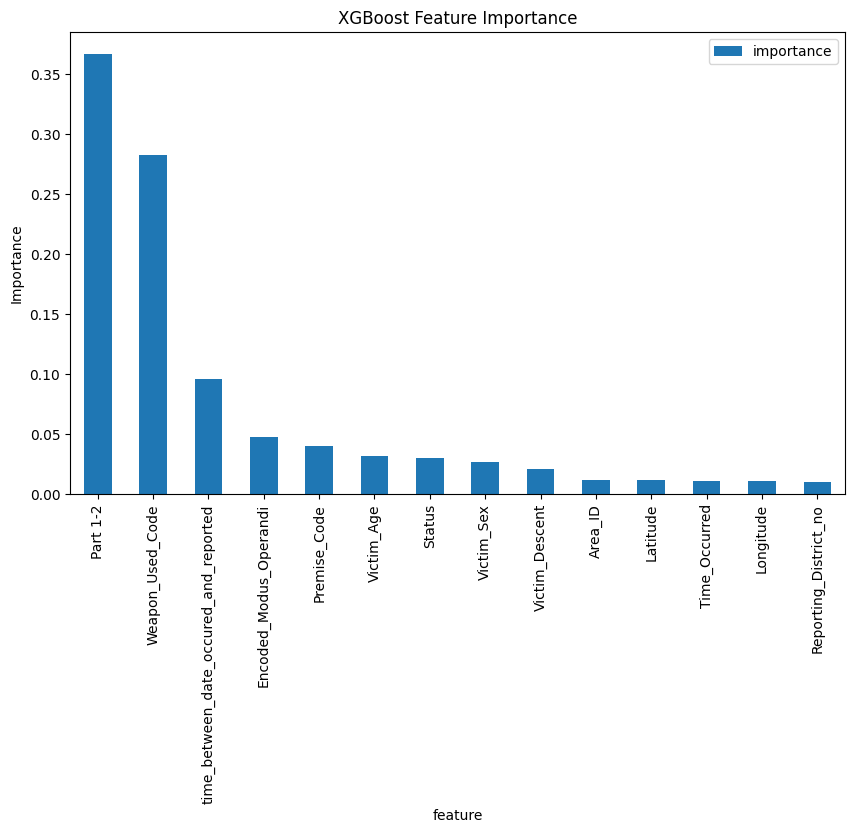

In [112]:

importance_df = pd.DataFrame({'feature': X_train_split.columns, 'importance': xgb_model.feature_importances_})
importance_df = importance_df.sort_values('importance', ascending=False)

print(importance_df)
importance_df.plot(kind='bar', x='feature', y='importance', figsize=(10, 6))
plt.title('XGBoost Feature Importance')
plt.ylabel('Importance')
plt.show()


Part 1-2 is the highest contributing column in the prediction

In [113]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Define and train the MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(128), activation='tanh', solver='adam', random_state=42)
# mlp.fit(X_train_split, Y_train_split)

# # Predictions
# '''y_pred = mlp.predict_proba(X_val)
# y_pred = (y_pred > 0.5).astype(int)'''


# # Predictions
# y_pred = mlp.predict(X_val_split)

# y_pred = pd.DataFrame(y_pred, columns=['Crime_Category'])
# # More detailed classification report
# print("Classification Report:")
# print(classification_report(Y_val_split, y_pred))





Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3497
           1       0.68      0.74      0.71      1430
           2       0.55      0.20      0.29       542
           3       0.60      0.78      0.68       406
           4       0.43      0.24      0.30        68
           5       0.00      0.00      0.00        54

    accuracy                           0.79      5997
   macro avg       0.52      0.48      0.48      5997
weighted avg       0.77      0.79      0.77      5997

Updating estimators

In [114]:
import os
import json
import pickle
import pandas as pd
import re
import numpy as np
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


class DataPrep:
    def __init__(self, train, test, modelartifacts_path):
        """
        Splits data into training and validation sets.

        Args:
            X: Features.
            y: Target variable.
            modelartifacts_path: Path to save model artifacts.
            test_size: Proportion of data for the validation set (default: 0.2).
        """
#         X_train, X_val, y_train, y_val = train_test_split(
#             X, y, test_size=test_size, random_state=42
#         )
        self.train_labels = train[['Crime_Category']]
        self.train_split = train.drop(['Crime_Category'], axis=1)
        self.val_split = test
        self.modelartifacts_path = modelartifacts_path
        self.dir_path = f"{self.modelartifacts_path}/"
        os.makedirs(self.dir_path, exist_ok=True)
        
    def save_object(self, feature, est):
        """
        Save the estimator object to a file.

        Parameters:
        - self: The instance of the class.
        - feature (str): The name of the feature or model.
        - est: The estimator object to be saved. It can be either a dictionary
               (if `estimator` is of type dict) or an object supported by pickle.

        Returns:
        - None
        """

        # Check if directory exists, create it if not
        if not os.path.exists(self.dir_path):
            os.makedirs(self.dir_path)

        # Save based on type
        if isinstance(est, dict):
            with open(f"{self.dir_path}/{feature}_est.json", "w") as f:
                json.dump(est, f)
        else:
            with open(f"{self.dir_path}/{feature}_est.pkl", "wb") as f:
                pickle.dump(est, f)

        # No exception handling, assumes successful save
        print(f"Estimator - {feature}_est - saved successfully")
        
    def label_encode(self):
        features = ['Victim_Descent', 'Status', 'Victim_Sex']
        for feature in features:
            label_encoder = LabelEncoder()

            # Identify new categories in val_split that are not in train_split
            new_categories = set(self.val_split[feature].unique()) - set(self.train_split[feature].unique())

            # Replace new categories in val_split with NaN
            if new_categories:
                self.val_split[feature] = self.val_split[feature].replace(to_replace=new_categories, value=np.nan)

            # Fill missing values with 'missing'
            self.train_split[feature].fillna("missing", inplace=True)
            self.val_split[feature].fillna("missing", inplace=True)

            # Fit LabelEncoder on the training data and transform both train and validation splits
            self.train_split[feature] = label_encoder.fit_transform(self.train_split[feature])
            self.val_split[feature] = label_encoder.transform(self.val_split[feature])

            # Save the fitted LabelEncoder object
            self.save_object(feature, label_encoder)


                    
    def imputation(self,):
        imputer = SimpleImputer(strategy='mean')
        self.train_split = imputer.fit_transform(self.train_split)
        self.val_split = imputer.transform(self.val_split)
        self.save_object(f"imputer", imputer)
        
    
    def scaling(self,):
        scaler = MinMaxScaler()

        # Recreate DataFrames to ensure correct structure after imputation
        self.train_split = pd.DataFrame(self.train_split, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
        'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
        'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'])
        self.val_split = pd.DataFrame(self.val_split, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
        'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
        'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'])

        # Columns for scaling
        numeric_cols = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age',
            'Premise_Code', 'Weapon_Used_Code',
        'time_between_date_occured_and_reported']

        for col in numeric_cols:
            # Reshape the data to 2D before transforming
            self.train_split[col] = scaler.fit_transform(self.train_split[[col]])
            self.val_split[col] = scaler.transform(self.val_split[[col]])

            self.save_object(f"{col}_scaler", scaler)

        
    
    def feature_generation(self):
        #generating new features
        self.train_split['Date_Reported'] = pd.to_datetime(self.train_split['Date_Reported'])
        self.train_split['Date_Occurred'] = pd.to_datetime(self.train_split['Date_Occurred'])
        self.train_split['time_between_date_occured_and_reported'] = (self.train_split['Date_Reported'] - self.train_split['Date_Occurred']) / pd.Timedelta(minutes=1)
        self.train_split['time_between_date_occured_and_reported'] = self.train_split['time_between_date_occured_and_reported'].abs().astype(int)

        self.val_split['Date_Reported'] = pd.to_datetime(self.val_split['Date_Reported'])
        self.val_split['Date_Occurred'] = pd.to_datetime(self.val_split['Date_Occurred'])
        self.val_split['time_between_date_occured_and_reported'] = (self.val_split['Date_Reported'] - self.val_split['Date_Occurred']) / pd.Timedelta(minutes=1)
        self.val_split['time_between_date_occured_and_reported'] = self.val_split['time_between_date_occured_and_reported'].abs().astype(int)
        
    def encode_modus_operandi(self, is_training=True, mapping_file='modus_operandi_mapping.json'):
        def encode_mo(mo_string, mapping):
            if pd.isna(mo_string) or mo_string == '':
                return '0'

            if not isinstance(mo_string, str):
                mo_string = str(mo_string)

            codes = re.findall(r'\d+', mo_string)
            encoded = [mapping.get(code, '0') for code in codes]
            return ''.join(encoded) if encoded else '0'

        # Replace NaN with '0'
        self.train_split['Modus_Operandi'] = self.train_split['Modus_Operandi'].fillna('0')
        if not is_training:
            self.val_split['Modus_Operandi'] = self.val_split['Modus_Operandi'].fillna('0')

        if is_training:
            # Extract unique codes and create a mapping
            unique_codes = set()
            for item in self.train_split['Modus_Operandi']:
                if isinstance(item, str):
                    codes = re.findall(r'\d+', item)
                    unique_codes.update(codes)

            code_mapping = {code: str(i+1) for i, code in enumerate(sorted(unique_codes))}

            # Save the mapping
            with open(f"{self.dir_path}/{mapping_file}", 'w') as f:
                json.dump(code_mapping, f)

            print("Code mapping created and saved.")
        else:
            # Load the mapping
            with open(f"{self.dir_path}/{mapping_file}", 'r') as f:
                code_mapping = json.load(f)

        # Apply encoding
        self.train_split['Encoded_Modus_Operandi'] = self.train_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))
#         if not is_training:
#             self.val_split['Encoded_Modus_Operandi'] = self.val_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))
        self.val_split['Encoded_Modus_Operandi'] = self.val_split['Modus_Operandi'].apply(lambda x: encode_mo(x, code_mapping))

        print("Modus Operandi encoding complete.")
        
    def output_mapping(self):
        
        replacement_dict = {'Property Crimes': 0,
                      'Violent Crimes': 1,
                      'Crimes against Public Order': 2,
                      'Fraud and White-Collar Crimes': 3,
                      'Crimes against Persons': 4,
                      'Other Crimes': 5}

        self.train_labels['Crime_Category'] = self.train_labels['Crime_Category'].replace(replacement_dict)


    
    def drop_columns(self,):
        self.train_split.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Cross_Street'],axis=1, inplace=True)
        self.val_split.drop(['Location', 'Date_Reported',
       'Date_Occurred', 'Area_Name',
       'Modus_Operandi',
        'Premise_Description',
       'Weapon_Description', 'Status_Description','Cross_Street'],axis=1, inplace=True)
    
    def process(self,):
        self.label_encode()
        print(self.train_split.columns)
        self.feature_generation()
        print(self.train_split.columns)
        self.encode_modus_operandi()
        print(self.train_split.columns)
        self.drop_columns()
        print(self.train_split.columns)
        print(self.val_split.columns)
        self.imputation()
        self.scaling()
        self.output_mapping()
        return self.train_split, self.val_split, self.train_labels

    
train = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
test = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
print("Columns in train:", train.columns.tolist())
#drop outliers
Q1 = train['Victim_Age'].quantile(0.25)
Q3 = train['Victim_Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 +  1.5 * IQR
train = train[(train['Victim_Age'] > lower_bound) & (train['Victim_Age'] < upper_bound)]
train.shape
# Y_train = train[['Crime_Category']]
# X_train = train.drop(['Crime_Category'], axis=1)
# X = X_train.copy()
# y = Y_train.copy()
output_path = '/kaggle/working/final_estimators'

data_prep = DataPrep(train,test, output_path)

X_train, X_test, Y_train = data_prep.process()


Columns in train: ['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name', 'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description', 'Weapon_Used_Code', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']
Estimator - Victim_Descent_est - saved successfully
Estimator - Status_est - saved successfully
Estimator - Victim_Sex_est - saved successfully
Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description'],
      dtype='object')


/tmp/ipykernel_18/3559844946.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.train_split[feature].fillna("missing", inplace=True)
/tmp/ipykernel_18/3559844946.py:78: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'time_between_date_occured_and_reported'],
      dtype='object')
Code mapping created and saved.
Modus Operandi encoding complete.
Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'time_between_date_occured_and_reported',
       'Encoded_Modus_Operandi'],
      dtype='object')
Ind

/tmp/ipykernel_18/3559844946.py:190: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.train_labels['Crime_Category'] = self.train_labels['Crime_Category'].replace(replacement_dict)
/tmp/ipykernel_18/3559844946.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.train_labels['Crime_Category'] = self.train_labels['Crime_Category'].replace(replacement_dict)


Building Inference pipeline

In [115]:
import xgboost as xgb 
from sklearn.multiclass import OneVsOneClassifier, OneVsOneClassifier

xgb_model = xgb.XGBClassifier(max_depth=7, n_estimators=200, min_child_weight=3, gamma=0.5, subsample=1.0, colsample_bytree=1.0, scale_pos_weight=1, learning_rate=0.1,objective='multi:softprob')
xgb_model.fit(X_train, Y_train)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:57:48] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [116]:
preds = xgb_model.predict(X_test)
preds = pd.DataFrame(preds, columns=['Crime_Category'])

In [117]:
preds

,Crime_Category
0,1
1,0
2,3
3,0
4,2
...,...
4995,0
4996,0
4997,1
4998,1


In [118]:
preds.shape

(5000, 1)

In [119]:
#pickling the xgboost model
model_filename = 'xgboost_model.pkl'
output_path = '/kaggle/working/final_estimators'

# Save the model to disk
with open(f'{output_path}/{model_filename}', 'wb') as file:
    pickle.dump(xgb_model, file)

print(f"Model saved to {f'{output_path}/{model_filename}'}")

Model saved to /kaggle/working/final_estimators/xgboost_model.pkl


In [120]:
'''from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train)'''

'from sklearn.ensemble import RandomForestClassifier\nclassifier = RandomForestClassifier(n_estimators=100, random_state=42)\nclassifier.fit(X_train, Y_train)'

In [121]:
'''preds = classifier.predict(X_test)
preds = pd.DataFrame(preds, columns=['Crime_Category'])'''

"preds = classifier.predict(X_test)\npreds = pd.DataFrame(preds, columns=['Crime_Category'])"

In [122]:
'''from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=300)
classifier.fit(X_train, Y_train)

from sklearn.metrics import classification_report
preds = classifier.predict(X_test)

preds = pd.DataFrame(preds, columns=['Crime_Category'])'''

"from sklearn.ensemble import GradientBoostingClassifier\n\nclassifier = GradientBoostingClassifier(n_estimators=300)\nclassifier.fit(X_train, Y_train)\n\nfrom sklearn.metrics import classification_report\npreds = classifier.predict(X_test)\n\npreds = pd.DataFrame(preds, columns=['Crime_Category'])"

In [123]:
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Define and train the MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(128), activation='tanh', solver='adam', random_state=42)
# mlp.fit(X_train, Y_train)

# # Predictions
# '''y_pred = mlp.predict_proba(X_val)
# y_pred = (y_pred > 0.5).astype(int)'''


# # Predictions
# y_pred = mlp.predict(X_val)

# y_pred = pd.DataFrame(y_pred, columns=['Crime_Category'])
# # More detailed classification report
# print("Classification Report:")
# print(classification_report(Y_val, y_pred))





In [124]:
import os
import json
import pickle
import pandas as pd
import numpy as np

class DataPreparation:
    def __init__(self, model_path):
        self.model_path = model_path
        
        # Load the saved estimators
        self.load_estimators()

    def load_estimators(self):
        # Load all necessary estimators used during training
        self.label_encoders = {}
        self.scalers = {}
        self.imputer = None

        # Load label encoders
        for feature in ['Victim_Descent', 'Status', 'Victim_Sex']:
            with open(f"{self.model_path}/{feature}_est.pkl", "rb") as f:
                self.label_encoders[feature] = pickle.load(f)

        # Load scalers
        for col in ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
                    'Reporting_District_no', 'Part 1-2', 'Victim_Age',
                    'Premise_Code', 'Weapon_Used_Code',
                    'time_between_date_occured_and_reported']:
            with open(f"{self.model_path}/{col}_scaler_est.pkl", "rb") as f:
                self.scalers[col] = pickle.load(f)

        # Load imputer
        with open(f"{self.model_path}/imputer_est.pkl", "rb") as f:
            self.imputer = pickle.load(f)

        # Load modus operandi mapping
        with open(f"{self.model_path}/modus_operandi_mapping.json", "r") as f:
            self.mo_mapping = json.load(f)

    def preprocess(self, data):
        # Apply feature generation
        data['Date_Reported'] = pd.to_datetime(data['Date_Reported'])
        data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'])
        data['time_between_date_occured_and_reported'] = (
            (data['Date_Reported'] - data['Date_Occurred']) / pd.Timedelta(minutes=1)
        ).abs().astype(int)

        # Encode modus operandi
        data['Encoded_Modus_Operandi'] = data['Modus_Operandi'].apply(
            lambda x: self.encode_mo(x)
        )

        # Label encoding
        for feature in ['Victim_Descent', 'Status', 'Victim_Sex']:
            data[feature] = data[feature].fillna("missing")
            
            # Handle unseen categories
            unseen_categories = set(data[feature].unique()) - set(self.label_encoders[feature].classes_)
            if unseen_categories:
                data[feature] = data[feature].replace(to_replace=unseen_categories, value=np.nan)
            
            # Fill NaN with a placeholder before transforming
            data[feature] = data[feature].fillna("missing")
            data[feature] = self.label_encoders[feature].transform(data[feature])

        # Dropping unnecessary columns
        data = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
                                           'Reporting_District_no', 'Part 1-2', 'Victim_Age',
                                           'Victim_Sex', 'Victim_Descent', 'Premise_Code',
                                           'Weapon_Used_Code', 'Status',
                                           'time_between_date_occured_and_reported',
                                           'Encoded_Modus_Operandi'])

        # Imputation
        data = self.imputer.transform(data)
        
        data = pd.DataFrame(data, columns=['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID',
        'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Victim_Sex',
        'Victim_Descent', 'Premise_Code', 'Weapon_Used_Code', 'Status',
        'time_between_date_occured_and_reported', 'Encoded_Modus_Operandi'])

        # Scaling
        for col in self.scalers.keys():
            data[col] = self.scalers[col].transform(data[[col]])



        return data

    def encode_mo(self, mo_string):
        if pd.isna(mo_string) or mo_string == '':
            return '0'
        if not isinstance(mo_string, str):
            mo_string = str(mo_string)
        codes = re.findall(r'\d+', mo_string)
        encoded = [self.mo_mapping.get(code, '0') for code in codes]
        return ''.join(encoded) if encoded else '0'


class Inference(object):
    def __init__(self, model_path):
        self.data_preparation = DataPreparation(model_path)
        # Load your trained model here, for example:
        with open(f"{model_path}/xgboost_model.pkl", "rb") as f:
            self.model = pickle.load(f)

    def predict(self, data):
        # Preprocess the data
        prepared_data = self.data_preparation.preprocess(data)

        # Make predictions
        predictions = self.model.predict(prepared_data)
        return predictions


# Example usage
output_path = '/kaggle/working/final_estimators/'
inference_pipeline = Inference(output_path)

# Load new data for inference
new_data = pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# Make predictions
predictions = inference_pipeline.predict(new_data)
print(predictions)


/tmp/ipykernel_18/3163636384.py:43: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_Reported'] = pd.to_datetime(data['Date_Reported'])
/tmp/ipykernel_18/3163636384.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date_Occurred'] = pd.to_datetime(data['Date_Occurred'])


[1 0 3 ... 1 1 0]


In [125]:
# preds = pd.DataFrame(predictions, columns=['Crime_Category'])

In [126]:
# preds.value_counts()

In [127]:
# preds.shape

In [128]:

replacement_dict = {0:  'Property Crimes',
                    1 : 'Violent Crimes',
                    2 : 'Crimes against Public Order',
                    3 : 'Fraud and White-Collar Crimes',
                    4 : 'Crimes against Persons',  \
                    5 : 'Other Crimes'} 
preds['Replaced_Crime_Category'] = preds['Crime_Category'].replace(replacement_dict)



In [129]:
preds

,Crime_Category,Replaced_Crime_Category
0,1,Violent Crimes
1,0,Property Crimes
2,3,Fraud and White-Collar Crimes
3,0,Property Crimes
4,2,Crimes against Public Order
...,...,...
4995,0,Property Crimes
4996,0,Property Crimes
4997,1,Violent Crimes
4998,1,Violent Crimes


In [130]:
#preds are my final output.
submission = pd.DataFrame({'ID':range(1,5001), 'Crime_Category': preds['Replaced_Crime_Category']})
submission.to_csv("submission.csv", index=False)

In [131]:
submission

,ID,Crime_Category
0,1,Violent Crimes
1,2,Property Crimes
2,3,Fraud and White-Collar Crimes
3,4,Property Crimes
4,5,Crimes against Public Order
...,...,...
4995,4996,Property Crimes
4996,4997,Property Crimes
4997,4998,Violent Crimes
4998,4999,Violent Crimes
